[View in Colaboratory](https://colab.research.google.com/github/ritzdevp/training-models/blob/master/ml_LAB_LINEAR_REGRESSION.ipynb)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'0B2y-RVc5A0pJcTI3dnJyYnpPVUZnTkZjQUhlWEtnMmhzb0hV'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Salary_Data.csv')  


In [0]:
data  = pd.read_csv('Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(data['YearsExperience'])
y = pd.DataFrame(data['Salary'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.3)

In [73]:
X_train.head()

,YearsExperience
14,4.5
2,1.5
9,3.7
25,9.0
4,2.2


In [74]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
prediction = reg.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [77]:
r2_score(y_test, prediction)

0.9875719650500361

In [0]:
import matplotlib.pyplot as plt

In [0]:
pred_on_train = reg.predict(X_train)

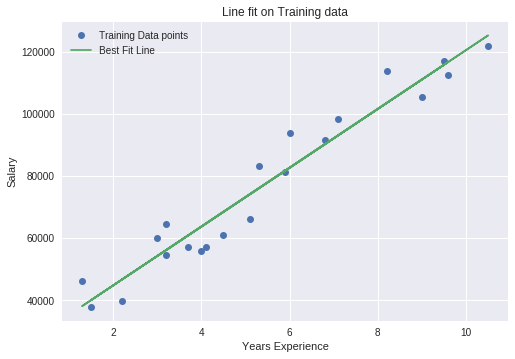

In [80]:
plt.plot(X_train.reset_index(drop=True), y_train.reset_index(drop=True), 'o', label='Training Data points')
plt.title("Line fit on Training data")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.plot(X_train.reset_index(drop=True), pred_on_train, label='Best Fit Line')
plt.legend()


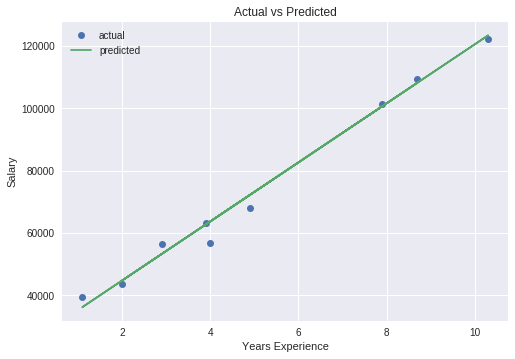

In [81]:
plt.plot(X_test.reset_index(drop=True), y_test.reset_index(drop=True), 'o', label = 'actual')
plt.title("Actual vs Predicted")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.plot(X_test.reset_index(drop=True), prediction, label='predicted')
plt.legend()